In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [174]:
N2_input = pd.read_csv('data/N2_input.csv', index_col='cycle')
N2_target = pd.read_csv('data/N2_target.csv', index_col='cycle')
NH3_input = pd.read_csv('data/NH3_input.csv', index_col='cycle')
NH3_target = pd.read_csv('data/NH3_target.csv', index_col='cycle')
N2_input.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.000423,0.000040,0.000463,0.000644,0.0,0.000060,0.000141,0.0,...,0.0,0.00002,0.00000,0.000000,0.000262,0.001087,0.000000,0.0,0.0,0.00004
1,0.0,0.0,0.000486,0.000405,0.000142,0.000546,0.0,0.000040,0.000000,0.0,...,0.0,0.00000,0.00000,0.000182,0.000101,0.001011,0.000000,0.0,0.0,0.00000
2,0.0,0.0,0.000261,0.000000,0.000221,0.000483,0.0,0.000241,0.000000,0.0,...,0.0,0.00000,0.00004,0.000101,0.000282,0.000825,0.000000,0.0,0.0,0.00000
3,0.0,0.0,0.000081,0.000000,0.000485,0.000546,0.0,0.000000,0.000162,0.0,...,0.0,0.00000,0.00000,0.000121,0.000040,0.001092,0.000202,0.0,0.0,0.00000
4,0.0,0.0,0.000120,0.000000,0.000160,0.000642,0.0,0.000261,0.000000,0.0,...,0.0,0.00000,0.00000,0.000000,0.000000,0.000822,0.000000,0.0,0.0,0.00000


(array([71., 23., 12., 10.,  2.,  1.]),
 array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006]),
 <BarContainer object of 6 artists>)

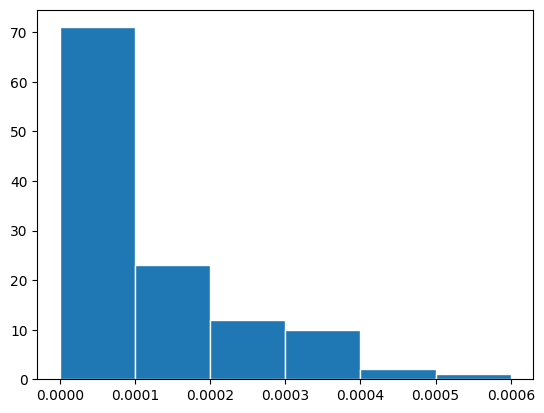

In [175]:
plt.hist(N2_input.iloc[:,3].values, bins=np.arange(0,0.0007,0.0001), edgecolor='white')

In [176]:
for i in range(len(N2_input.index)):
    for j in range(len(N2_input.columns)):
        if N2_input.iloc[i,j]<0.0001:
            N2_input.iloc[i,j]=0

for i in range(len(NH3_input.index)):
    for j in range(len(NH3_input.columns)):
        if NH3_input.iloc[i,j]<0.0001:
            NH3_input.iloc[i,j]=0

In [177]:
N2_target.head()

,C1s,N1s,O1s,Si2p,Cl2p
cycle,,,,,
0,0.023402,0.275563,0.188880,0.474089,0.038067
1,0.023367,0.275311,0.188843,0.474470,0.038009
2,0.023331,0.275058,0.188807,0.474851,0.037952
3,0.023296,0.274806,0.188771,0.475232,0.037894
4,0.023261,0.274554,0.188735,0.475613,0.037836


In [178]:
NH3_input

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.004101,0.002187,0.004647,0.009568,0.000000,0.001367,0.000000,0.0,...,0.0,0.000000,0.0,0.001640,0.000000,0.013669,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.000508,0.000000,0.004319,0.008638,0.000508,0.000000,0.000000,0.0,...,0.0,0.001524,0.0,0.000000,0.001270,0.011433,0.000000,0.0,0.0,0.001016
2,0.0,0.0,0.005486,0.002494,0.004738,0.011970,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.001746,0.011471,0.000000,0.0,0.0,0.000000
3,0.0,0.0,0.000716,0.002387,0.001910,0.007878,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.001432,0.011220,0.000000,0.0,0.0,0.000000
4,0.0,0.0,0.000711,0.000000,0.002134,0.008063,0.000949,0.000949,0.000000,0.0,...,0.0,0.001186,0.0,0.001660,0.000711,0.012094,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.0,0.0,0.001506,0.000000,0.004268,0.012051,0.001004,0.000000,0.001506,0.0,...,0.0,0.000000,0.0,0.002009,0.000000,0.012804,0.000000,0.0,0.0,0.000000
59,0.0,0.0,0.000517,0.003881,0.002846,0.007503,0.000000,0.000517,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.013454,0.000000,0.0,0.0,0.001552
60,0.0,0.0,0.002957,0.001232,0.003696,0.012075,0.002464,0.001232,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.010843,0.000739,0.0,0.0,0.000000


In [179]:
NH3_target

,C1s,N1s,O1s,Si2p,Cl2p
cycle,,,,,
0,0.013147,0.466584,0.044964,0.472566,0.002740
1,0.013152,0.465232,0.045568,0.473319,0.002730
2,0.013156,0.463879,0.046172,0.474073,0.002719
3,0.013161,0.462527,0.046776,0.474827,0.002709
4,0.013166,0.461175,0.047380,0.475581,0.002698
...,...,...,...,...,...
58,0.013224,0.280720,0.123958,0.579462,0.002636
59,0.013223,0.276163,0.125874,0.582100,0.002641
60,0.013222,0.271606,0.127789,0.584738,0.002645


In [180]:
# spectral range
N2_input = N2_input.iloc[:,range(294,1813)]
NH3_input = NH3_input.iloc[:,range(294,1813)]

In [181]:
N2_input.columns = [round(float(i), 1) for i in N2_input.columns.values]
NH3_input.columns = [round(float(i), 1) for i in NH3_input.columns.values]

In [182]:
print(len(NH3_input), len(NH3_target), len(N2_input), len(N2_target))

63 63 119 119


In [183]:
# interpolation
import numpy as np
new_col = np.arange(NH3_input.columns[0], NH3_input.columns[-1]+0.1, 0.1)
NH3_input_inter = pd.DataFrame(columns=new_col, index=NH3_input.index)
for idx, row in NH3_input.iterrows():
    NH3_input_inter.iloc[idx] = np.interp(new_col, NH3_input.columns.values, NH3_input.iloc[idx])
NH3_input_inter.index.name = 'cycle'
NH3_input_inter

,199.7,199.8,199.9,200.0,200.1,200.2,200.3,200.4,200.5,200.6,...,1049.4,1049.5,1049.6,1049.7,1049.8,1049.9,1050.0,1050.1,1050.2,1050.3
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000319,0.000638,0.000957,0.001276,...,0.014762,0.013578,0.012393,0.011208,0.010889,0.01057,0.010252,0.009933,0.009614,0.009295
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.012322,0.011348,0.010374,0.0094,0.009358,0.009316,0.009273,0.009231,0.009189,0.009146
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000457,0.000914,0.001372,0.001829,...,0.008354,0.007814,0.007273,0.006733,0.006983,0.007232,0.007481,0.007731,0.00798,0.008229
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000279,0.000557,0.000836,0.001114,...,0.010623,0.009947,0.00927,0.008594,0.007878,0.007162,0.006445,0.005729,0.005013,0.004297
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008063,0.007588,0.007114,0.00664,0.006086,0.005533,0.00498,0.004427,0.003873,0.00332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.0,0.0,0.0,0.0,0.0,0.0,0.000586,0.001172,0.001757,0.002343,...,0.00816,0.007616,0.007072,0.006528,0.006193,0.005858,0.005523,0.005189,0.004854,0.004519
59,0.0,0.0,0.0,0.0,0.0,0.0,0.000216,0.000431,0.000647,0.000862,...,0.009573,0.009487,0.009401,0.009314,0.008064,0.006813,0.005563,0.004312,0.003062,0.001811
60,0.0,0.0,0.0,0.0,0.0,0.0,0.000041,0.000082,0.000123,0.000164,...,0.007639,0.006982,0.006325,0.005668,0.005627,0.005586,0.005545,0.005504,0.005462,0.005421


In [184]:
NH3_input_inter = NH3_input_inter.iloc[:,3:8504]
NH3_input_inter

,200.0,200.1,200.2,200.3,200.4,200.5,200.6,200.7,200.8,200.9,...,1049.1,1049.2,1049.3,1049.4,1049.5,1049.6,1049.7,1049.8,1049.9,1050.0
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.000319,0.000638,0.000957,0.001276,0.001595,0.001914,0.002296,...,0.018316,0.017131,0.015947,0.014762,0.013578,0.012393,0.011208,0.010889,0.01057,0.010252
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000203,...,0.015244,0.01427,0.013296,0.012322,0.011348,0.010374,0.0094,0.009358,0.009316,0.009273
2,0.0,0.0,0.0,0.000457,0.000914,0.001372,0.001829,0.002286,0.002743,0.002195,...,0.009975,0.009435,0.008894,0.008354,0.007814,0.007273,0.006733,0.006983,0.007232,0.007481
3,0.0,0.0,0.0,0.000279,0.000557,0.000836,0.001114,0.001393,0.001671,0.001671,...,0.012652,0.011976,0.011299,0.010623,0.009947,0.00927,0.008594,0.007878,0.007162,0.006445
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000854,...,0.009485,0.009011,0.008537,0.008063,0.007588,0.007114,0.00664,0.006086,0.005533,0.00498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.0,0.0,0.0,0.000586,0.001172,0.001757,0.002343,0.002929,0.003515,0.003364,...,0.009792,0.009248,0.008704,0.00816,0.007616,0.007072,0.006528,0.006193,0.005858,0.005523
59,0.0,0.0,0.0,0.000216,0.000431,0.000647,0.000862,0.001078,0.001294,0.001708,...,0.009832,0.009746,0.009659,0.009573,0.009487,0.009401,0.009314,0.008064,0.006813,0.005563
60,0.0,0.0,0.0,0.000041,0.000082,0.000123,0.000164,0.000205,0.000246,0.000197,...,0.009611,0.008954,0.008296,0.007639,0.006982,0.006325,0.005668,0.005627,0.005586,0.005545


In [185]:
new_col = np.arange(N2_input.columns[0], N2_input.columns[-1]+0.1, 0.1)
N2_input_inter = pd.DataFrame(columns=new_col, index=N2_input.index)
for idx, row in N2_input.iterrows():
    N2_input_inter.iloc[idx] = np.interp(new_col, N2_input.columns.values, N2_input.iloc[idx])
N2_input_inter.index.name = 'cycle'
N2_input_inter = N2_input_inter.iloc[:,3:8504]
N2_input_inter

,200.0,200.1,200.2,200.3,200.4,200.5,200.6,200.7,200.8,200.9,...,1049.1,1049.2,1049.3,1049.4,1049.5,1049.6,1049.7,1049.8,1049.9,1050.0
cycle,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.00007,0.000141,0.000211,0.000282,0.000352,0.000423,0.000455,...,0.029563,0.029332,0.0291,0.028869,0.028637,0.028405,0.028174,0.027788,0.027402,0.027016
1,0.000109,0.000146,0.000182,0.000239,0.000297,0.000354,0.000411,0.000469,0.000526,0.000542,...,0.030749,0.030395,0.030041,0.029687,0.029333,0.028979,0.028625,0.028156,0.027687,0.027219
2,0.0,0.0,0.0,0.000091,0.000181,0.000272,0.000362,0.000453,0.000543,0.000515,...,0.031897,0.031488,0.031079,0.030671,0.030262,0.029853,0.029444,0.029075,0.028706,0.028338
3,0.0,0.0,0.0,0.000108,0.000216,0.000324,0.000431,0.000539,0.000647,0.000599,...,0.031958,0.031611,0.031263,0.030916,0.030569,0.030222,0.029875,0.029403,0.028931,0.028459
4,0.0,0.0,0.0,0.000043,0.000087,0.00013,0.000174,0.000217,0.000261,0.000289,...,0.033019,0.032615,0.03221,0.031805,0.031401,0.030996,0.030592,0.030177,0.029763,0.029348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.0,0.0,0.0,0.000129,0.000259,0.000388,0.000517,0.000647,0.000776,0.000672,...,0.047139,0.046797,0.046456,0.046115,0.045774,0.045432,0.045091,0.044426,0.043762,0.043097
115,0.00025,0.000232,0.000215,0.000265,0.000316,0.000366,0.000416,0.000466,0.000517,0.000538,...,0.048166,0.047826,0.047485,0.047144,0.046803,0.046462,0.046122,0.045225,0.044328,0.043431
116,0.0,0.0,0.0,0.0001,0.000201,0.000301,0.000402,0.000502,0.000603,0.000633,...,0.049112,0.048556,0.047999,0.047443,0.046887,0.046331,0.045775,0.045143,0.044511,0.04388


In [168]:
import random
random.seed(1)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(20)]

In [186]:
from numpy import random
x = []
while len(set(x))<63:
    x.append(random.randint(1, 118))
len(list(set(x)))

63

In [187]:
# striking the balance between N2 and Nh3 datasets
N2_input = N2_input_inter.iloc[list(set(x)),:]
N2_target = N2_target.iloc[list(set(x)),:]
print(len(N2_input), len(N2_target))

63 63


In [191]:
# combine N2 and NH3 data
data = pd.concat([N2_input, NH3_input_inter])
target = pd.concat([N2_target, NH3_target])
print(len(data), len(target))
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=42)

126 126


[C1s] train score : 1.0 test score : 0.999


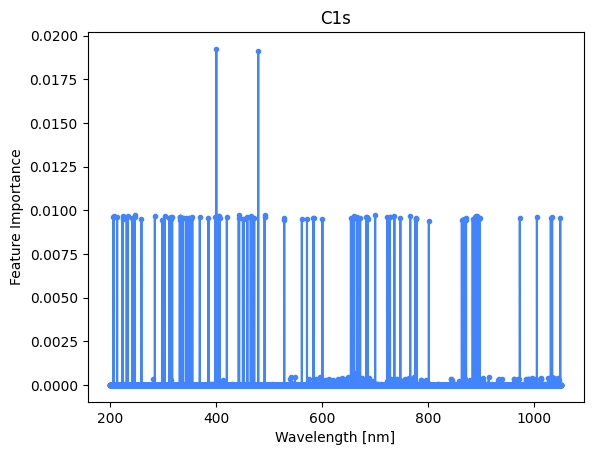

[N1s] train score : 0.951 test score : 0.755


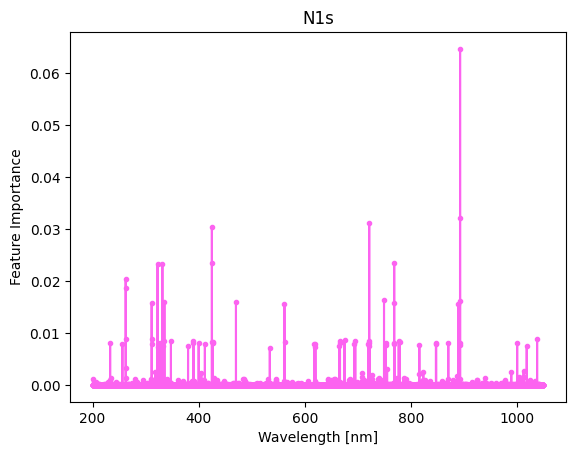

[O1s] train score : 0.983 test score : 0.922


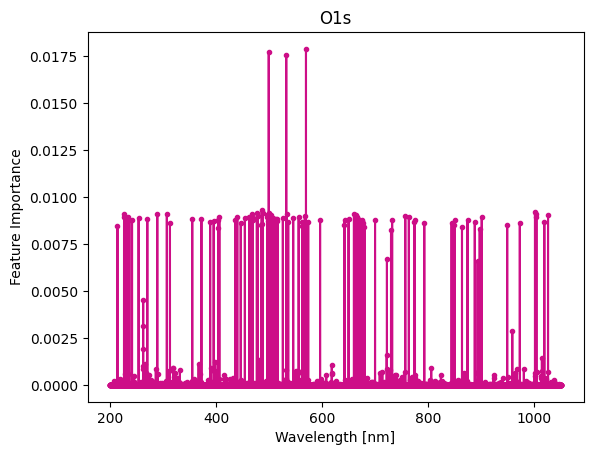

[Si2p] train score : 0.897 test score : 0.273


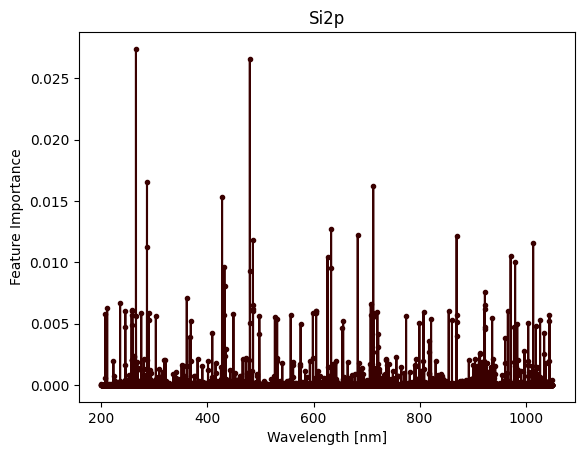

[Cl2p] train score : 1.0 test score : 0.999


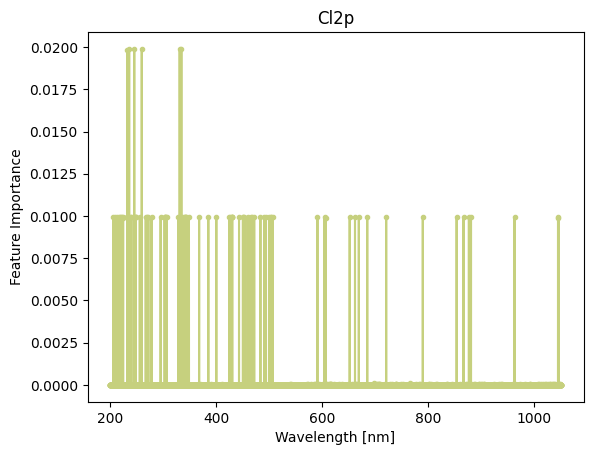

all together : 0.9676581335112496 0.7886662544697545


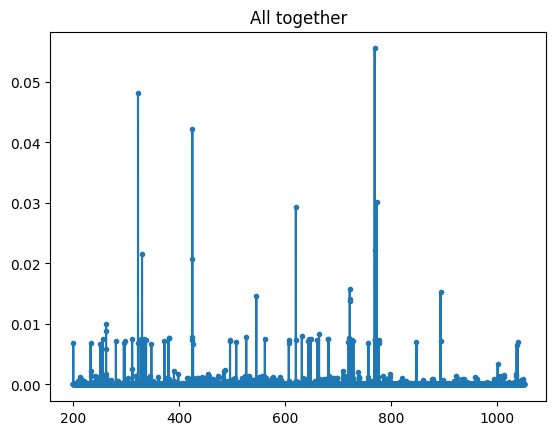

In [192]:
wv = [float(i) for i in N2_input.columns]

for idx, col in enumerate(target.columns):
    rr = RandomForestRegressor()
    rr.fit(train_input, train_target[col])
    print(f'[{col}]', 'train score :', np.round(rr.score(train_input, train_target[col]),3), 'test score :', np.round(rr.score(test_input, test_target[col]), 3))
    plt.plot(wv, rr.feature_importances_, '.-', color=colors[idx])
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Feature Importance')
    plt.title(col)
    plt.show()

rr = RandomForestRegressor()
rr.fit(train_input, train_target)
print('all together :', rr.score(train_input, train_target), rr.score(test_input, test_target))
plt.plot(wv, rr.feature_importances_, '.-')
plt.title('All together')
plt.show()

In [193]:
ref = pd.read_excel('../file/etc/emission_spectrum.xlsx')
ref.head()

,name,wavelength
0,SiN,353.5
1,SiN,404.8
2,SiN,405.1
3,SiN,408.0
4,SiN,408.7


In [195]:
wv_n = []
name_n = []
for idx, row in ref.iterrows():
    if 'N' in row['name']:
        wv_n.append(row['wavelength'])
        name_n.append(row['name'])

In [200]:
col = 'N1s'
rr_n = RandomForestRegressor()
rr_n.fit(train_input, train_target[col])
print(rr.score(train_input, train_target[col], rr_n.score(test_input, test_target[col])))
plt.plot(wv, rr_n.feature_importances_, '.-')
plt.title(f'{col}')
plt.show()

InvalidParameterError: The 'sample_weight' parameter of r2_score must be an array-like or None. Got 0.7443750592047911 instead.